In [157]:
import numpy as np

In [158]:
import pandas as pd

In [159]:
import matplotlib.pyplot as plt 

In [160]:
import seaborn as sns

In [161]:
df=pd.read_csv(r"C:\Users\tessl\Downloads\train_ctrUa4K.csv")

In [162]:
df1=pd.read_csv(r"C:\Users\tessl\Downloads\test_lAUu6dG.csv")

In [163]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [164]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [165]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [166]:
train_original=df.copy()
test_original=df1.copy()

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [168]:
df.shape

(614, 13)

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [170]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [171]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [172]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [173]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [174]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [175]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:>

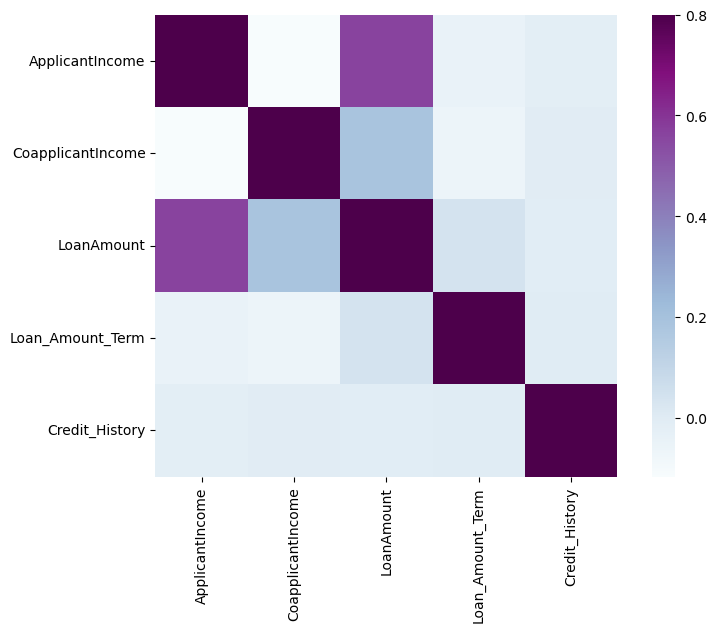

In [176]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

In [177]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [179]:
df.Gender=df.Gender.map({"Female":0,"Male":1})
df.Married=df.Married.map({"No":0,"Yes":1})
df.Self_Employed=df.Self_Employed.map({"No":0,"Yes":1})
df.Education=df.Education.map({"Not":1,"Graduate":0})
df.Property_Area=df.Property_Area.map({"Urban":0,"Rural":1})
df.Loan_Status=df.Loan_Status.map({"N":0,"Y":1})
df.Dependents=df.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [180]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0.0,2583,2358.0,120.000000,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,0.0,1


In [181]:
df1.Gender=df1.Gender.map({"Female":0,"Male":1})
df1.Married=df1.Married.map({"No":0,"Yes":1})
df1.Self_Employed=df1.Self_Employed.map({"No":0,"Yes":1})
df1.Education=df1.Education.map({"Not":1,"Graduate":0})
df1.Property_Area=df1.Property_Area.map({"Urban":0,"Rural":1})
df1.Dependents=df1.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [182]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,NaN,0.0
4,LP001051,1.0,0,0.0,NaN,0.0,3276,0,78.0,360.0,1.0,0.0


In [183]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Education"].fillna(df["Education"].mode()[0],inplace=True)
df["Property_Area"].fillna(df["Property_Area"].mode()[0],inplace=True)

In [184]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [185]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [186]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [187]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Test value fill missing value

In [188]:
df1.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education             84
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area        116
dtype: int64

In [189]:
df1["Gender"].fillna(df1["Gender"].mode()[0],inplace=True)
df1["Married"].fillna(df1["Married"].mode()[0],inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode()[0],inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0],inplace=True)
df1["Credit_History"].fillna(df1["Credit_History"].mode()[0],inplace=True)
df1["Education"].fillna(df1["Education"].mode()[0],inplace=True)
df1["Property_Area"].fillna(df1["Property_Area"].mode()[0],inplace=True)

In [190]:
df1["Loan_Amount_Term"].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [191]:
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mode()[0],inplace=True)

In [192]:
df1["LoanAmount"].fillna(df1["LoanAmount"].median(),inplace=True)

In [193]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Feature Engineering

In [194]:
df['Total_Income']=df["ApplicantIncome"]+df['CoapplicantIncome']
df1['Total_Income']=df1["ApplicantIncome"]+df1['CoapplicantIncome']

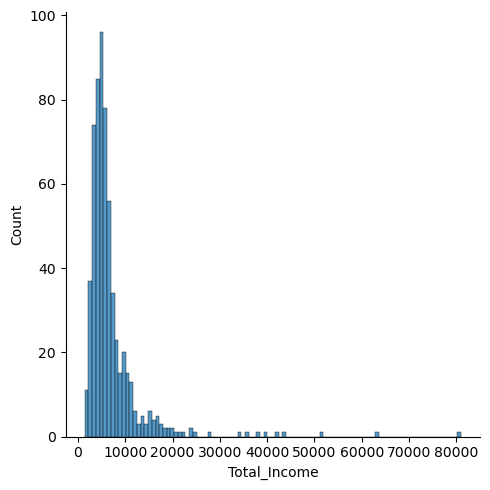

In [195]:
sns.displot(df["Total_Income"])

In [196]:
df=df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5849.0
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,6091.0
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,3000.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,4941.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6000.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,2900.0
610,1.0,1.0,3.0,0.0,0.0,1.0,1.0,1,4106.0
611,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1,8312.0
612,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1,7583.0


In [197]:
df.dtypes

Gender            float64
Married           float64
Dependents        float64
Education         float64
Self_Employed     float64
Credit_History    float64
Property_Area     float64
Loan_Status         int64
Total_Income      float64
dtype: object

In [198]:
df1=df1.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [199]:
df1=df1.drop("Loan_ID",axis=1)
df1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income
0,1.0,1,0.0,0.0,0.0,1.0,0.0,5720
1,1.0,1,1.0,0.0,0.0,1.0,0.0,4576
2,1.0,1,2.0,0.0,0.0,1.0,0.0,6800
3,1.0,1,2.0,0.0,0.0,1.0,0.0,4886
4,1.0,0,0.0,0.0,0.0,1.0,0.0,3276
...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0.0,1.0,1.0,0.0,5786
363,1.0,1,0.0,0.0,0.0,1.0,0.0,4867
364,1.0,0,0.0,0.0,0.0,1.0,0.0,5243
365,1.0,1,0.0,0.0,0.0,1.0,1.0,7393


In [200]:
df1.dtypes

Gender            float64
Married             int64
Dependents        float64
Education         float64
Self_Employed     float64
Credit_History    float64
Property_Area     float64
Total_Income        int64
dtype: object

In [201]:
x=df.drop("Loan_Status",1)
y=df.Loan_Status

C:\Users\tessl\AppData\Local\Temp\ipykernel_38524\2968297848.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop("Loan_Status",1)


In [202]:
x=pd.get_dummies(x)
df=pd.get_dummies(df)

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [204]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

#PRINT THE PREDICTION OF THE RANDOM FOREST CLASSIFIER
pred_rf=forest.predict(x_test)
acc_rf=accuracy_score(y_test,pred_rf)*100
acc_rf

74.5945945945946

In [205]:
pred_test=forest.predict(df1)

In [225]:
loancsv=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})
loancsv.set_index("Loan_ID", inplace=True)

In [226]:
loancsv

,Loan_Status
Loan_ID,
LP001015,1
LP001022,1
LP001031,1
LP001035,1
LP001051,1
...,...
LP002971,1
LP002975,1
LP002980,1


In [232]:
loancsv['Loan_Status'].value_counts()

Y    265
N    102
Name: Loan_Status, dtype: int64

In [233]:
loancsv["Loan_Status"].replace(0,"N",inplace=True)
loancsv["Loan_Status"].replace(1,"Y",inplace=True)

In [234]:
loancsv

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [235]:
loancsv.to_csv("tessfinal1.csv")